In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model_v5s = torch.hub.load('ultralytics/yolov5','yolov5s')
model_v5s

Using cache found in C:\Users\aayus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-15 Python-3.11.4 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
model_v5n = torch.hub.load('ultralytics/yolov5','yolov5n')
model_v5n

Using cache found in C:\Users\aayus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-15 Python-3.11.4 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
# Class weights used for misclassification
weights = [2.149352569319134, 2.627497312012588, 9.82683994692708, 1.0139124996829427, 1.413527034943481, 2.8205625565232717, 11.217853820693014, 4.697342230844685, 45.49462938392166, 24.08539202678206, 21.362695536798, 8.41339036551976, 38.99539661479, 31.905324503009997, 17.802246280665, 2.094381915372353, 14.451235216069234, 9.906088656176493, 12.161930627384999, 6.26711731309125, 26.7033694209975, 41.63915231748763, 58.493094922185, 54.593555260706005, 79.24870924941195, 6.315449837356735, 223.33727152107, 153.54437417073564, 409.451664455295, 491.341997346354, 223.33727152107, 122.8354993365885, 272.96777630353, 204.7258322276475, 614.1774966829425]

In [5]:
img = 'DATS_2022/Images with Annotations/Images/1 (1).jpg'
results = model_v5s(img)

results.print()

C:\Users\aayus/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:891: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(autocast):
image 1/1: 4624x3472 3 persons, 2 cars, 3 motorcycles, 2 trucks
Speed: 410.2ms pre-process, 169.0ms inference, 337.7ms NMS per image at shape (1, 3, 640, 480)


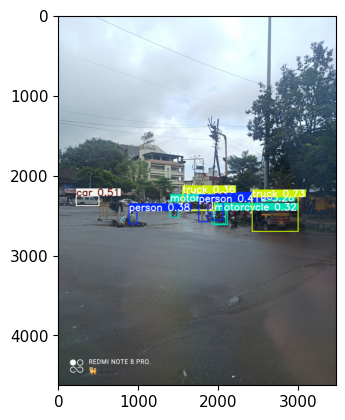

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.xyxy

[tensor([[2.42509e+03, 2.27494e+03, 2.99939e+03, 2.70460e+03, 7.30543e-01, 7.00000e+00],
         [2.28706e+02, 2.26134e+03, 5.11806e+02, 2.38389e+03, 5.05920e-01, 2.00000e+00],
         [1.75828e+03, 2.33628e+03, 1.87359e+03, 2.58448e+03, 4.05718e-01, 0.00000e+00],
         [8.86679e+02, 2.44798e+03, 9.86453e+02, 2.61111e+03, 3.77459e-01, 0.00000e+00],
         [1.55302e+03, 2.22241e+03, 1.95450e+03, 2.44474e+03, 3.63649e-01, 7.00000e+00],
         [1.55347e+03, 2.23178e+03, 1.92869e+03, 2.43542e+03, 3.62839e-01, 2.00000e+00],
         [1.92205e+03, 2.30440e+03, 2.06197e+03, 2.56282e+03, 3.48512e-01, 0.00000e+00],
         [1.40074e+03, 2.32977e+03, 1.50166e+03, 2.52607e+03, 3.30937e-01, 3.00000e+00],
         [1.95347e+03, 2.44215e+03, 2.11416e+03, 2.62093e+03, 3.18162e-01, 3.00000e+00],
         [1.92246e+03, 2.32984e+03, 2.09380e+03, 2.61028e+03, 2.56921e-01, 3.00000e+00]], device='cuda:0')]

In [8]:
np.array(results.render()).shape

(1, 4624, 3472, 3)

In [9]:
labels = ['Traffic Signal', 'Lamp Post', 'Zebra Crossing', 'Bike', 'Car', 'Rikshaw', 'Tyre Works', 'Tree', 'Tractor', 'Cattle', 'Vegetation', 'Electricity Pole', 'Building', 'Board', 'Wall', 'person', 'Bus', 'Bridge', 'Road Divider', 'Tempo', 'Traffic Sign Board', 'Flag', 'Crane', 'Cycle', 'Dog', 'Truck', 'WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW', 'Overbridge', 'Manhole', 'Bus Stop', 'Barricade', 'Petrol Pump', 'Ambulance', 'Goat', 'Cart']
len(labels)

35

In [13]:
!python yolov5/train.py --img 320 --batch 16 --epochs 50 --data yolov5/dataset.yaml --weights yolov5s.pt --workers 0

^C


In [2]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5-master/runs/train/exp/weights/best.pt')
model

Using cache found in C:\Users\tshar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-21 Python-3.11.6 torch-2.1.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
!python yolov5/detect.py --img 320 --conf 0.25 --weights yolov5/runs/train/exp/weights/best.pt --source "DATS_2022/Images with Annotations/images"

^C


detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=DATS_2022/Images with Annotations/images, data=yolov5\data\coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'D:\Sharan\Sri': No such file or directory
YOLOv5  2024-9-15 Python-3.11.4 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7104520 parameters, 0 gradients, 16.0 GFLOPs
WARNING  NMS time limit 0.550s exceeded
image 1/2048 D:\Sharan\Sri City Internship\v5\DATS_2022\Images with Annotations\images\1 (1).jpg: 320x256 3 Bikes, 1 Electricity Pole, 43.0ms
image 2/2048 D:\Shar